### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

### Loading the datase

In [4]:
df=load_digits()

In [13]:
dfx=df['data']

In [14]:
dfy=df['target']

In [15]:
dfx[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [51]:
dfx[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Visualizing the data using plt.imshow()

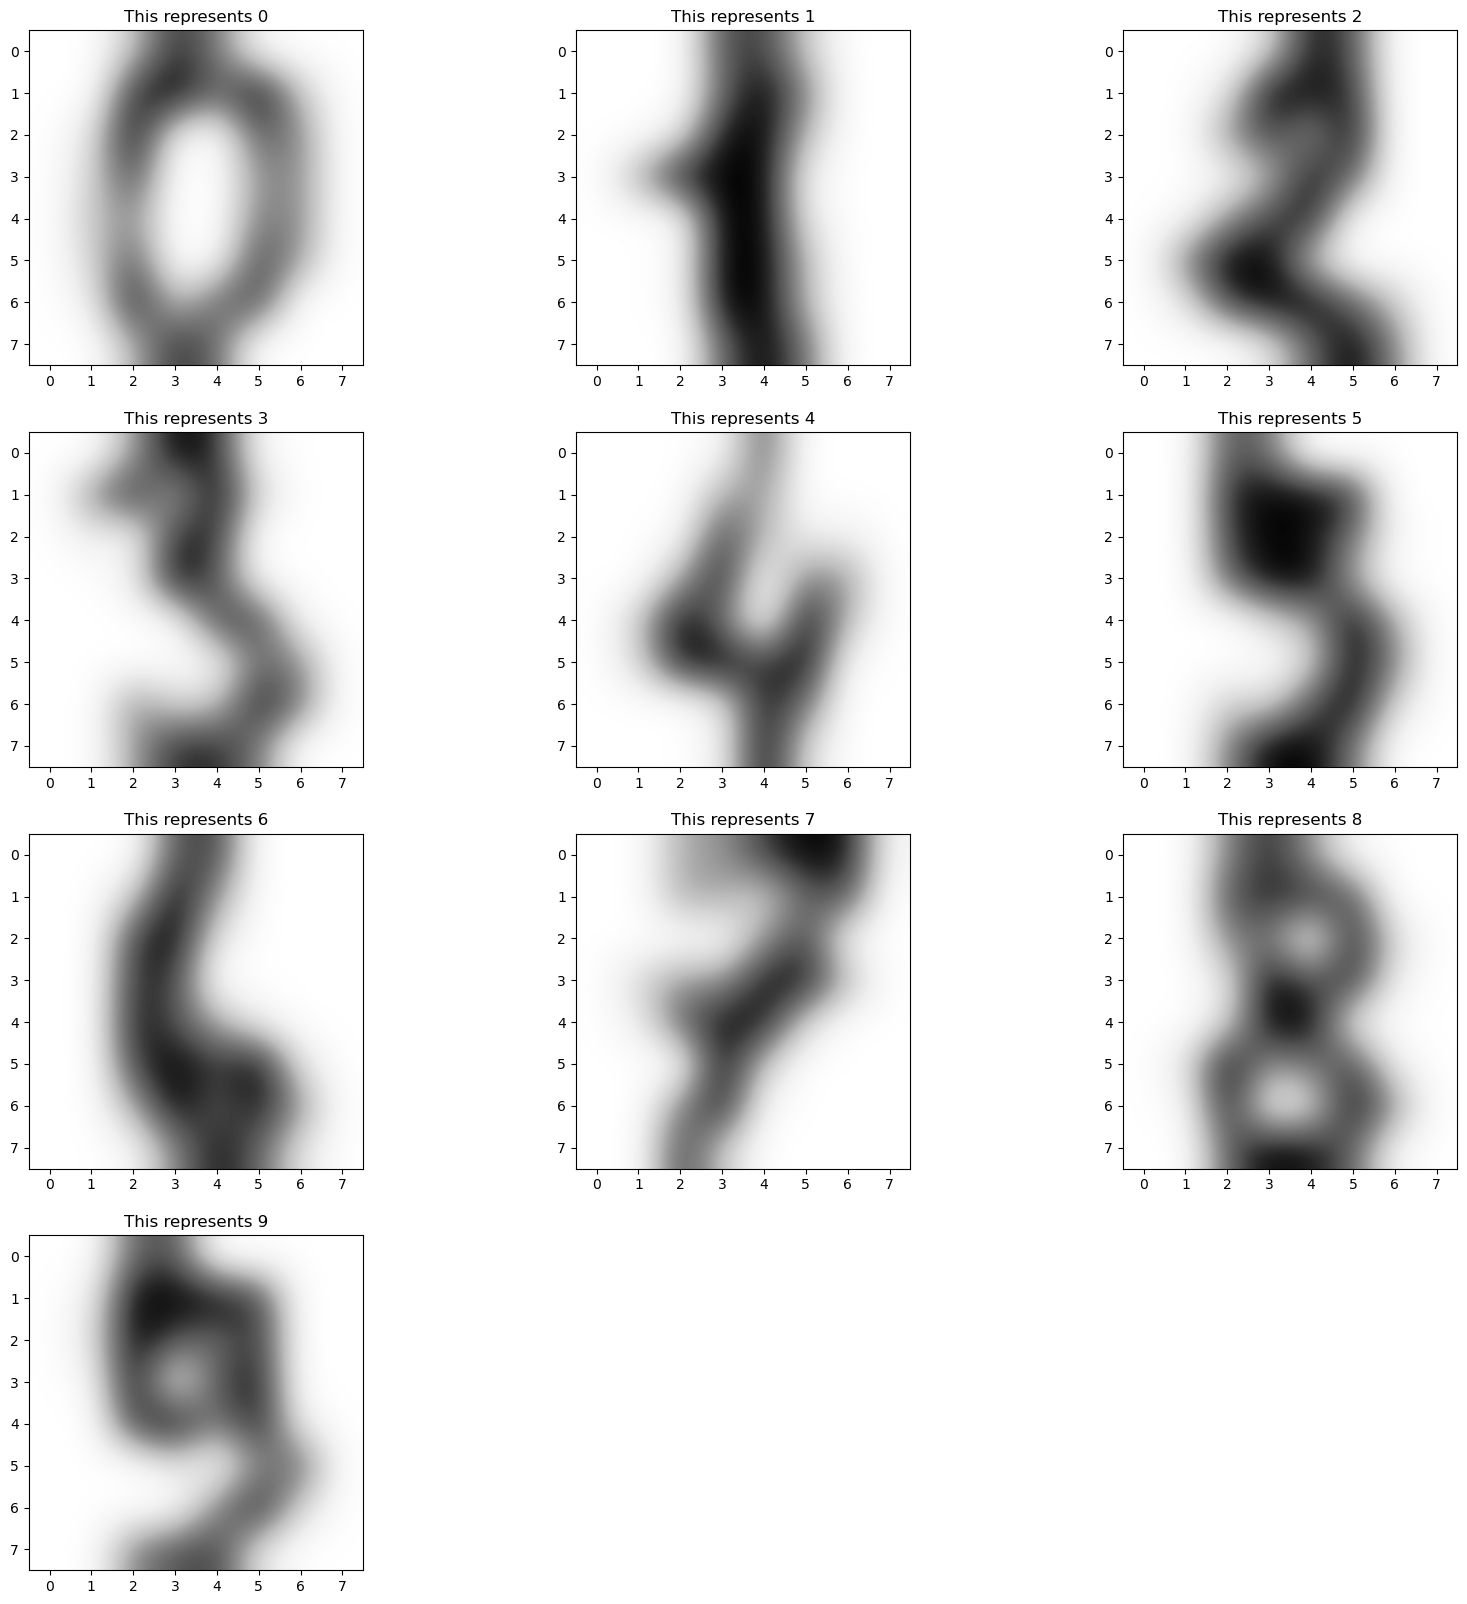

In [93]:
plt.figure(figsize=(20,20))
for index,(image,label) in enumerate(zip(dfx[:10],dfy[:10])):
    plt.subplot(4,3,(index+1)).imshow(image.reshape(8,8),cmap='Greys',aspect='1',interpolation='bicubic')
    plt.title(f'This represents {label}')
    


### Splitting data to train and test set

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=.25,random_state=10)

### Making the model

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg=LogisticRegression()

In [60]:
logreg.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
prediction=logreg.predict(x_test)

### Testing the model

In [71]:
overall_score=logreg.score(x_test,y_test)
overall_score

0.9577777777777777

In [65]:
import sklearn.metrics as metrics

In [72]:
cm=metrics.confusion_matrix(prediction,y_test)
cm

array([[46,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  1,  1,  1,  0,  1,  0],
       [ 0,  1, 45,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 46,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 39,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 46]], dtype=int64)

In [73]:
import seaborn as sns

Text(0.5, 1.0, 'The overall accuracy is 0.9577777777777777')

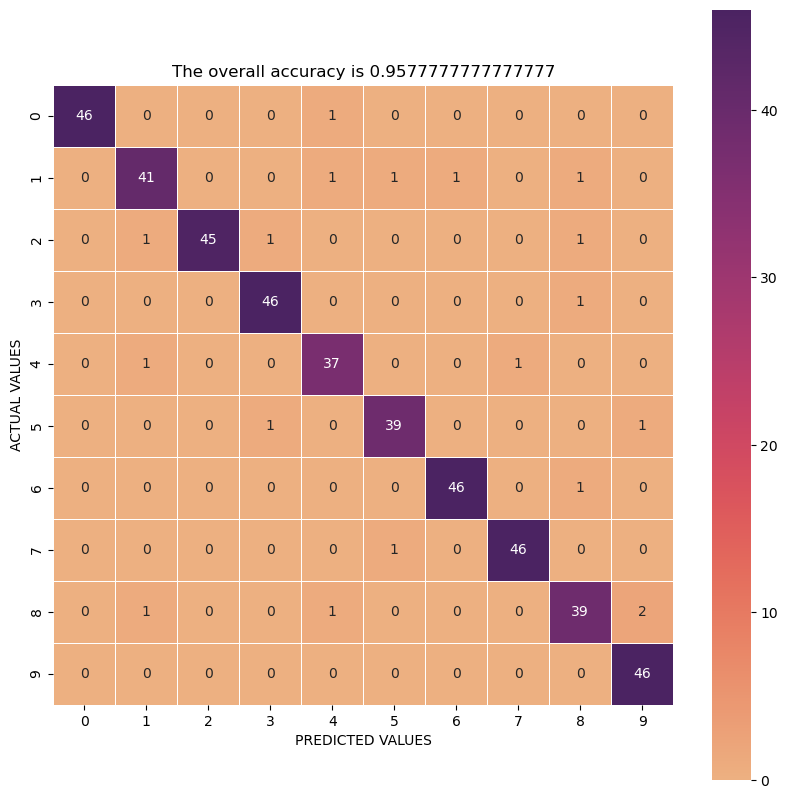

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cbar=True,square=True,cmap='flare',linewidths=0.5)
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.title(f'The overall accuracy is {overall_score}',loc='center')


In [118]:
report=metrics.classification_report(prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.93      0.91      0.92        45
           2       1.00      0.94      0.97        48
           3       0.96      0.98      0.97        47
           4       0.93      0.95      0.94        39
           5       0.95      0.95      0.95        41
           6       0.98      0.98      0.98        47
           7       0.98      0.98      0.98        47
           8       0.91      0.91      0.91        43
           9       0.94      1.00      0.97        46

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### Visualizing wrong predictions

In [99]:

index_list=[]
for index,val in enumerate(zip(prediction,y_test)):
    if val[0]!=val[1]:
        index_list.append(index)
index_list

[27,
 38,
 51,
 68,
 121,
 124,
 129,
 154,
 180,
 245,
 249,
 276,
 291,
 294,
 321,
 326,
 328,
 363,
 393]

In [100]:
n=len(index_list)
n

19

In [103]:
k=np.ceil(np.sqrt(n))
k

5.0

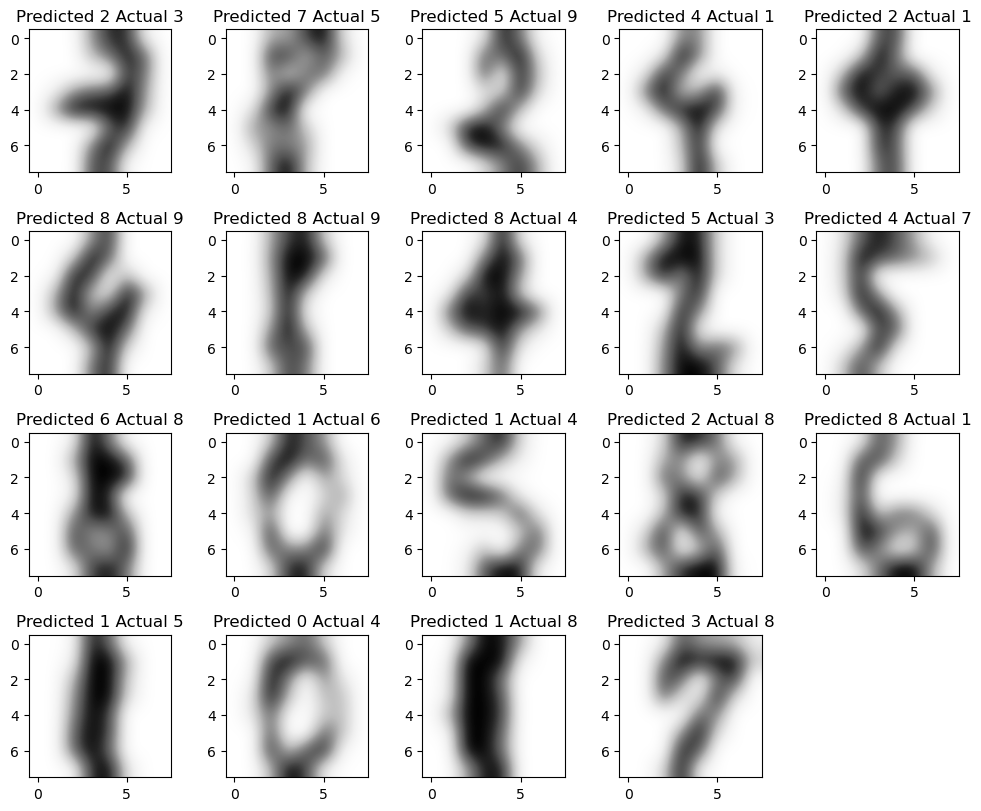

In [109]:
plt.figure(figsize=(2*k,2*k))
for i,j in enumerate(index_list):
    plt.subplot(int(k),int(k),i+1).imshow(dfx[j].reshape(8,8),cmap='Greys',aspect='1',interpolation='bicubic')
    plt.title(f'Predicted {prediction[j]} Actual {y_test[j]}')
plt.tight_layout()